## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Sat Aug 10 21:28:43 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.48                 Driver Version: 410.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
|  0%   55C    P5    18W / 200W |    350MiB /  8118MiB |      7%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 128, 64, 32]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidd

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 78us/step - loss: 1.7323 - acc: 0.3839 - val_loss: 1.5526 - val_acc: 0.4474
Epoch 2/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.4879 - acc: 0.4758 - val_loss: 1.4603 - val_acc: 0.4888
Epoch 3/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.3617 - acc: 0.5182 - val_loss: 1.3723 - val_acc: 0.5194
Epoch 4/100
50000/50000 [==============================] - 2s 34us/step - loss: 1.2636 - acc: 0.5544 - val_loss: 1.4054 - val_acc: 0.5128
Epoch 5/100
50000/50000 [==============================] - 2s 33us/step - loss: 1.1681 - acc: 0.5875 - val_loss: 1.3798 - val_acc: 0.5216
Epoch 6/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.0890 - acc: 0.6151 - val_loss: 1.3740 - val_acc: 0.5300
Epoch 7/100
50000/50000 [==============================] - 2s 43us/step - 

50000/50000 [==============================] - 2s 33us/step - loss: 0.0961 - acc: 0.9698 - val_loss: 3.2719 - val_acc: 0.5362
Epoch 58/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.0865 - acc: 0.9717 - val_loss: 3.2845 - val_acc: 0.5488
Epoch 59/100
50000/50000 [==============================] - 2s 35us/step - loss: 0.0725 - acc: 0.9773 - val_loss: 3.4707 - val_acc: 0.5424
Epoch 60/100
50000/50000 [==============================] - 2s 33us/step - loss: 0.0720 - acc: 0.9771 - val_loss: 3.4778 - val_acc: 0.5398
Epoch 61/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.0696 - acc: 0.9778 - val_loss: 3.4503 - val_acc: 0.5357
Epoch 62/100
50000/50000 [==============================] - 2s 33us/step - loss: 0.0833 - acc: 0.9733 - val_loss: 3.3080 - val_acc: 0.5357
Epoch 63/100
50000/50000 [==============================] - 2s 35us/step - loss: 0.0767 - acc: 0.9763 - val_loss: 3.5210 - val_acc: 0.5322
Epoch 64/100
50000/50000 [==============

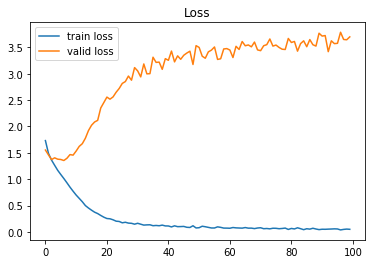

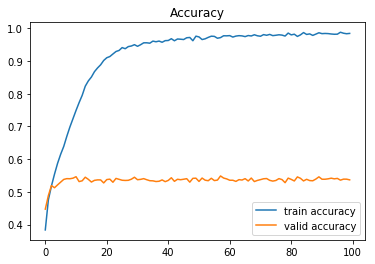

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()